<a href="https://colab.research.google.com/github/gilsonauerswald/Bioinformatic_Projects/blob/main/Lesson_5_Intro_Molecular_Modeling_Full_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧪 Introduction to Python for Molecular Modeling

#Learning Objectives
###Set up a molecular modeling environment in Google Colab
###Retrieve protein structures from the PDB
###Analyze protein sequences and structural geometry
###Identify and analyze ligands

In [ ]:
#Environment Setup
# Install only what’s needed, avoid full notebook upgrade

!pip install "numpy<2.0" --quiet
!pip install biopython nglview==2.7.7 rdkit-pypi --quiet
!jupyter-nbextension enable nglview --py --sys-prefix
!pip install matplotlib ipywidgets

from google.colab import output
output.enable_custom_widget_manager()

# Confirm success
print("✅ Environment setup complete. Ready to import libraries!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 799.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 14.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 41.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.0 MB/s eta 0:00:00
Enabling notebook extension nglview-js-widgets/extension...
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
P

In [ ]:
# Basic Python libraries
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Biopython for handling protein structures
from Bio.PDB import *
from Bio.PDB.PDBParser import PDBParser
from Bio.PDB.PDBIO import PDBIO

# For fetching PDB files
import urllib.request

# For visualization
import nglview as nv
from IPython.display import display

# Check if we're in Google Colab
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    # Apply Colab-specific fixes for NGLView
    from google.colab import output
    output.enable_custom_widget_manager()

print("Setup complete! All libraries imported successfully.")

Setup complete! All libraries imported successfully.


Defining custom three_to_one mapping
Use default PDB ID (1AKE)? (yes/no): yes
Using default PDB ID: 1AKE


/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3794.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3858.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3915.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4156.
  warnings.warn(


Downloaded to ./1ake.pdb

Parsing PDB file: ./1ake.pdb
Successfully parsed structure: 1AKE
Number of models: 1

Model ID: 0
Number of chains: 2

Chains in this structure:
Chain A: 456 residues, 1954 atoms
Chain B: 352 residues, 1850 atoms

Available chains for sequence analysis: A, B
Enter chain ID to analyze (press Enter for first chain): A
Analyzing chain A...

Sequence length: 214
First 50 amino acids: MRIILLGAPGAGKGTQAQFIMEKYGIPQISTGDMLRAAVKSGSELGKQAK...

Amino acid composition:
G: 20 (9.3%)
A: 19 (8.9%)
V: 19 (8.9%)
K: 18 (8.4%)
E: 18 (8.4%)
D: 17 (7.9%)
L: 16 (7.5%)
I: 14 (6.5%)
R: 13 (6.1%)
T: 11 (5.1%)
P: 10 (4.7%)
Q: 8 (3.7%)
Y: 7 (3.3%)
M: 6 (2.8%)
F: 5 (2.3%)
S: 5 (2.3%)
N: 4 (1.9%)
H: 3 (1.4%)
C: 1 (0.5%)


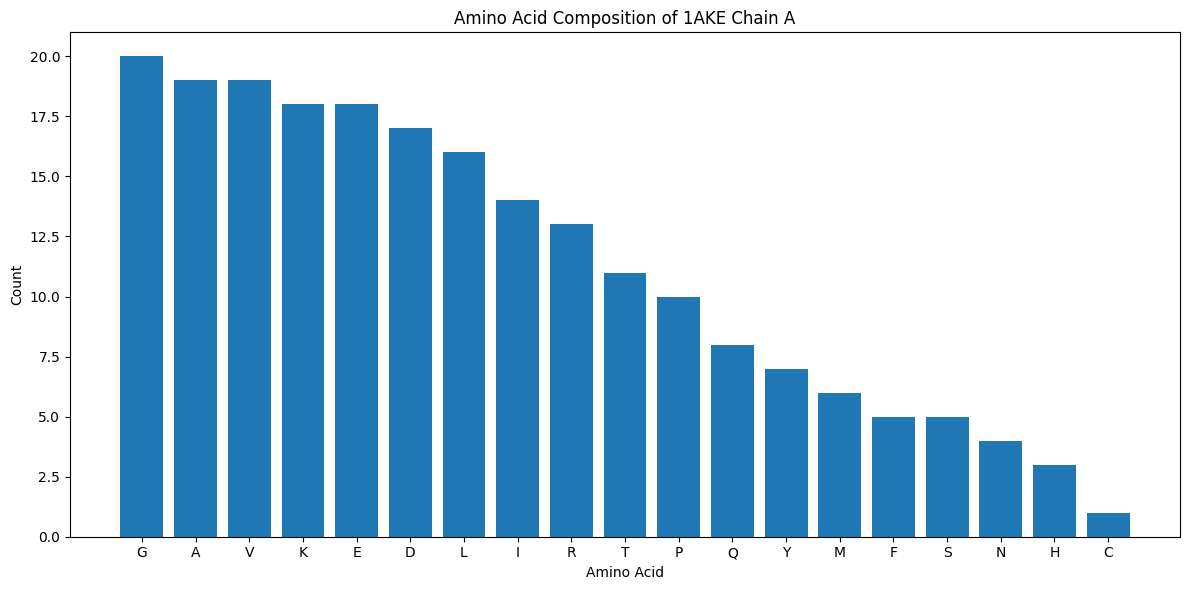


Sequence analysis complete!


In [ ]:
# COMBINED CELL: Download, Parse PDB, and Analyze Sequence
# This integrated cell handles the full process from downloading to sequence analysis

# Basic imports (repeat these to ensure they're available in this cell)
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from Bio.PDB import *
from Bio.PDB.PDBParser import PDBParser
import urllib.request

# Import the correct module for three_to_one conversion
# In newer Biopython versions, this is in a different location
try:
    # Try the newer location first
    from Bio.PDB.Polypeptide import three_to_one_letter as three_to_one
    print("Using Bio.PDB.Polypeptide.three_to_one_letter")
except ImportError:
    try:
        # Try the traditional location
        from Bio.PDB.Polypeptide import three_to_one
        print("Using Bio.PDB.Polypeptide.three_to_one")
    except ImportError:
        # As a last resort, define our own mapping
        print("Defining custom three_to_one mapping")
        def three_to_one(three_letter):
            # Standard amino acid mapping
            aa_dict = {
                'ALA': 'A', 'CYS': 'C', 'ASP': 'D', 'GLU': 'E',
                'PHE': 'F', 'GLY': 'G', 'HIS': 'H', 'ILE': 'I',
                'LYS': 'K', 'LEU': 'L', 'MET': 'M', 'ASN': 'N',
                'PRO': 'P', 'GLN': 'Q', 'ARG': 'R', 'SER': 'S',
                'THR': 'T', 'VAL': 'V', 'TRP': 'W', 'TYR': 'Y'
            }
            return aa_dict.get(three_letter, 'X')  # X for unknown

# Step 1: Download/Get PDB file
def download_pdb(pdb_id, save_dir='.'):
    """Download a PDB file from the RCSB PDB server."""
    pdb_id = pdb_id.lower()
    url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
    file_path = os.path.join(save_dir, f"{pdb_id}.pdb")

    # Only download if the file doesn't already exist
    if not os.path.exists(file_path):
        print(f"Downloading {pdb_id} from RCSB PDB...")
        try:
            urllib.request.urlretrieve(url, file_path)
            print(f"Downloaded to {file_path}")
        except Exception as e:
            print(f"Error downloading PDB file: {e}")
            return None
    else:
        print(f"Using existing file: {file_path}")

    return file_path

# Get PDB file - either use default or let user specify
default_pdb_id = "1AKE"
use_default = input(f"Use default PDB ID ({default_pdb_id})? (yes/no): ").lower().strip()

if use_default in ['yes', 'y', '']:
    pdb_id = default_pdb_id
    print(f"Using default PDB ID: {pdb_id}")
else:
    pdb_id = input("Enter the 4-character PDB ID (e.g., 4HHB): ").strip()
    print(f"Using PDB ID: {pdb_id}")

# Download the PDB file
pdb_file = download_pdb(pdb_id)

# Step 2: Parse the PDB file
if pdb_file and os.path.exists(pdb_file):
    print(f"\nParsing PDB file: {pdb_file}")
    # Create a PDB parser object with QUIET=False to see any parse warnings
    parser = PDBParser(QUIET=False)

    try:
        # Parse the file and store the structure
        structure = parser.get_structure(pdb_id, pdb_file)
        print(f"Successfully parsed structure: {structure.id}")

        # Basic information about the structure
        print(f"Number of models: {len(structure)}")

        # Get the first model
        model = structure[0]
        print(f"\nModel ID: {model.id}")
        print(f"Number of chains: {len(model)}")

        # List all chains
        print("\nChains in this structure:")
        for chain in model:
            n_residues = len(list(chain.get_residues()))
            n_atoms = len(list(chain.get_atoms()))
            print(f"Chain {chain.id}: {n_residues} residues, {n_atoms} atoms")

        # Step 3: Get amino acid sequence and analyze
        def get_sequence(chain):
            """Extract the amino acid sequence from a protein chain."""
            # Get standard residues (amino acids) and sort them by position
            residues = [res for res in chain if is_aa(res)]
            residues.sort(key=lambda x: x.id[1])  # Sort by residue number

            # Get a reference to standard amino acid names
            # In different Biopython versions, this might be in different places
            try:
                standard_aa_names = Polypeptide.standard_aa_names
            except:
                # If not found, define our own list of standard amino acids
                standard_aa_names = [
                    'ALA', 'CYS', 'ASP', 'GLU', 'PHE', 'GLY', 'HIS', 'ILE',
                    'LYS', 'LEU', 'MET', 'ASN', 'PRO', 'GLN', 'ARG', 'SER',
                    'THR', 'VAL', 'TRP', 'TYR'
                ]

            # Convert to one-letter amino acid code
            sequence = ''.join([three_to_one(res.resname) for res in residues
                              if res.resname in standard_aa_names])
            return sequence

        # Get a chain to analyze
        chain_ids = [chain.id for chain in model]

        if chain_ids:
            print(f"\nAvailable chains for sequence analysis: {', '.join(chain_ids)}")
            chain_to_analyze = input(f"Enter chain ID to analyze (press Enter for first chain): ").strip()

            if chain_to_analyze and chain_to_analyze in chain_ids:
                chain_a = model[chain_to_analyze]
            else:
                if chain_to_analyze:
                    print(f"Chain {chain_to_analyze} not found. Using first chain.")
                else:
                    print(f"Using first chain.")
                chain_a = model[chain_ids[0]]

            print(f"Analyzing chain {chain_a.id}...")

            # Get sequence
            sequence_a = get_sequence(chain_a)

            if sequence_a:
                print(f"\nSequence length: {len(sequence_a)}")
                if len(sequence_a) > 50:
                    print(f"First 50 amino acids: {sequence_a[:50]}...")
                else:
                    print(f"Full sequence: {sequence_a}")

                # Calculate amino acid composition
                aa_counts = Counter(sequence_a)
                sorted_aa = sorted(aa_counts.items(), key=lambda x: x[1], reverse=True)

                print("\nAmino acid composition:")
                for aa, count in sorted_aa:
                    print(f"{aa}: {count} ({count/len(sequence_a)*100:.1f}%)")

                # Plot amino acid composition
                plt.figure(figsize=(12, 6))
                aa_labels = [aa for aa, _ in sorted_aa]
                aa_values = [count for _, count in sorted_aa]
                plt.bar(aa_labels, aa_values)
                plt.title(f"Amino Acid Composition of {pdb_id.upper()} Chain {chain_a.id}")
                plt.xlabel("Amino Acid")
                plt.ylabel("Count")
                plt.xticks(rotation=0)
                plt.tight_layout()
                plt.show()

                print("\nSequence analysis complete!")
            else:
                print("No amino acid sequence found in this chain.")
        else:
            print("No chains found in structure for sequence analysis.")

    except Exception as e:
        print(f"Error during structure parsing or analysis: {e}")
        import traceback
        traceback.print_exc()  # Print full traceback for debugging
else:
    print("Error: No valid PDB file available for analysis.")

In [ ]:
# Calculate the center of mass of the protein
def calculate_center_of_mass(chain):
    """
    Calculate the center of mass of a chain.

    Parameters:
    -----------
    chain : Bio.PDB.Chain
        A protein chain object

    Returns:
    --------
    center : numpy.ndarray
        The center of mass [x, y, z]
    """
    coordinates = np.array([atom.coord for atom in chain.get_atoms()])
    center = coordinates.mean(axis=0)
    return center

    # Calculate radius of gyration (measure of protein compactness)
def calculate_radius_of_gyration(chain):
    """
    Calculate the radius of gyration of a protein chain.

    Parameters:
    -----------
    chain : Bio.PDB.Chain
        A protein chain object

    Returns:
    --------
    rg : float
        Radius of gyration in Angstroms
    """
    coords = np.array([atom.coord for atom in chain.get_atoms()])
    center = coords.mean(axis=0)
    rg = np.sqrt(np.sum(np.sum((coords - center)**2, axis=1)) / len(coords))
    return rg

try:
    # Calculate properties
    com_a = calculate_center_of_mass(chain_a)
    rg_a = calculate_radius_of_gyration(chain_a)

    print(f"Center of mass: [{com_a[0]:.2f}, {com_a[1]:.2f}, {com_a[2]:.2f}]")
    print(f"Radius of gyration: {rg_a:.2f} Å")

# Calculate secondary structure composition if possible
    try:
        # Using Bio.PDB's built-in DSSP wrapper if available
        from Bio.PDB.DSSP import DSSP
        dssp = DSSP(model, pdb_file)

        # Count secondary structure elements
        ss_counts = Counter([dssp[key][1] for key in dssp.keys()])

        print("\nSecondary structure composition:")
        ss_types = {
            'H': 'Alpha helix',
            'B': 'Beta bridge',
            'E': 'Extended strand (Beta sheet)',
            'G': '3-10 helix',
            'I': 'Pi helix',
            'T': 'Turn',
            'S': 'Bend',
            '-': 'Other'
        }

        for ss_type, count in ss_counts.items():
            ss_name = ss_types.get(ss_type, f"Unknown ({ss_type})")
            print(f"{ss_name}: {count}")
    except:
        print("DSSP analysis not available. Skipping secondary structure composition.")

except Exception as e:
    print(f"Error calculating structural properties: {e}")
    print("Skipping structural properties analysis.")

Center of mass: [23.93, 45.71, 24.10]
Radius of gyration: 16.86 Å
DSSP analysis not available. Skipping secondary structure composition.


In [ ]:
# ## 6. Identifying and Analyzing Ligands
#
# Let's identify any ligands present in the structure:

# %%
# Function to find ligands (non-protein, non-water molecules)
def find_ligands(model):
    """
    Find ligands (non-protein, non-water molecules) in the structure.

    Parameters:
    -----------
    model : Bio.PDB.Model
        A protein model object

    Returns:
    --------
    ligands : list
        List of ligand residues
    """
    ligands = []

    for chain in model:
        for residue in chain:
            # Skip standard amino acids and water
            if is_aa(residue) or residue.resname == 'HOH':
                continue
            ligands.append(residue)

    return ligands

try:
    # Find and print ligands
    ligands = find_ligands(model)
    print(f"Found {len(ligands)} ligand(s):")

    for i, ligand in enumerate(ligands):
        n_atoms = len(list(ligand.get_atoms()))
        print(f"{i+1}. {ligand.resname} (Chain {ligand.parent.id}, Residue {ligand.id[1]}): {n_atoms} atoms")

    # If no ligands were found, tell the user
    if not ligands:
        print("No ligands found in this structure.")
except Exception as e:
    print(f"Error finding ligands: {e}")
    print("Skipping ligand analysis.")
    ligands = []


# If we found any ligands, let's analyze the first one in more detail:


# Analyze the first ligand if any were found
if ligands:
    # Get the selected ligand
    ligand = ligands[0]  # Or whichever ligand you want to analyze

    print(f"Detailed analysis of ligand {ligand.resname}:")

    # List all atoms in the ligand
    print("\nAtoms:")
    for atom in ligand:
        print(f"{atom.name}: {atom.element} at position [{atom.coord[0]:.2f}, {atom.coord[1]:.2f}, {atom.coord[2]:.2f}]")

    # Calculate ligand center and dimensions
    coords = np.array([atom.coord for atom in ligand.get_atoms()])
    center = coords.mean(axis=0)
    dimensions = coords.max(axis=0) - coords.min(axis=0)

    print(f"\nLigand center: [{center[0]:.2f}, {center[1]:.2f}, {center[2]:.2f}]")
    print(f"Ligand dimensions: {dimensions[0]:.2f} × {dimensions[1]:.2f} × {dimensions[2]:.2f} Å³")

   # Check if RDKit is available
try:
    from rdkit import Chem
    from rdkit.Chem import AllChem, Draw
    from rdkit.Chem.Draw import IPythonConsole
    IPythonConsole.ipython_3d = True  # Enable 3D molecule visualization
    rdkit_available = True
    print("RDKit is available.")
except ImportError:
    print("RDKit not available. Some ligand analysis functions will be disabled.")
    rdkit_available = False

# Analyze the first ligand if any were found
if ligands:
    # Get the selected ligand
    ligand = ligands[0]  # Or whichever ligand you want to analyze

    print(f"Detailed analysis of ligand {ligand.resname}:")

    # List all atoms in the ligand
    print("\nAtoms:")
    for atom in ligand:
        print(f"{atom.name}: {atom.element} at position [{atom.coord[0]:.2f}, {atom.coord[1]:.2f}, {atom.coord[2]:.2f}]")

    # Calculate ligand center and dimensions
    coords = np.array([atom.coord for atom in ligand.get_atoms()])
    center = coords.mean(axis=0)
    dimensions = coords.max(axis=0) - coords.min(axis=0)

    print(f"\nLigand center: [{center[0]:.2f}, {center[1]:.2f}, {center[2]:.2f}]")
    print(f"Ligand dimensions: {dimensions[0]:.2f} × {dimensions[1]:.2f} × {dimensions[2]:.2f} Å³")

Found 2 ligand(s):
1. AP5 (Chain A, Residue 215): 57 atoms
2. AP5 (Chain B, Residue 215): 57 atoms
Detailed analysis of ligand AP5:

Atoms:
PA: P at position [18.09, 46.96, 20.53]
O1A: O at position [17.89, 47.95, 21.58]
O2A: O at position [18.85, 47.33, 19.36]
O3A: O at position [18.39, 45.55, 21.25]
PB: P at position [19.80, 44.95, 21.71]
O1B: O at position [19.33, 44.01, 22.76]
O2B: O at position [20.63, 46.06, 22.14]
O3B: O at position [20.35, 44.14, 20.43]
PG: P at position [21.90, 43.76, 20.17]
O1G: O at position [21.90, 42.51, 19.18]
O2G: O at position [22.35, 43.23, 21.47]
O3G: O at position [22.63, 44.92, 19.62]
PD: P at position [23.80, 45.11, 18.53]
O1D: O at position [23.85, 46.58, 18.29]
O2D: O at position [23.33, 44.32, 17.36]
O3D: O at position [25.87, 44.77, 18.89]
PE: P at position [25.83, 43.46, 19.55]
O1E: O at position [24.47, 42.55, 19.66]
O2E: O at position [26.41, 43.60, 20.90]
O5F: O at position [16.66, 46.58, 19.96]
C5F: C at position [16.54, 45.84, 18.77]
C4F: